<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Optics Clustering

This Code template is for the Cluster analysis using a simple OPTICS (Ordering Points To Identify Cluster Structure) Clustering algorithm.It draws inspiration from the DBSCAN clustering algorithm. The Code Template includes 2D and 3D cluster visualization of the Clusters.

### Required Packages

In [ ]:
!pip install plotly

In [93]:
import operator
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
from sklearn.cluster import OPTICS
warnings.filterwarnings("ignore")

### Initialization

Filepath of CSV file

In [94]:
file_path = ""

List of features which are required for model training

In [95]:
features=[]

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [96]:
df=pd.read_csv(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [97]:
X = df[features]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [98]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [99]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
X.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


### Model

The OPTICS algorithm shares many similarities with the DBSCAN algorithm, and can be considered a generalization of DBSCAN that relaxes the eps requirement from a single value to a value range. The key difference between DBSCAN and OPTICS is that the OPTICS algorithm builds a reachability graph, which assigns each sample both a reachability_ distance, and a spot within the cluster ordering_ attribute; these two attributes are assigned when the model is fitted, and are used to determine cluster membership.
[More detail](https://scikit-learn.org/stable/modules/clustering.html#optics)

#### Tuning Parameters

**min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. 

**max_eps**: The maximum distance between two samples for one to be considered as in the neighborhood of the other.

**metric**: Metric to use for distance computation. Any metric from scikit-learn or scipy.spatial.distance can be used.

**p**: Parameter for the Minkowski metric from pairwise_distances. 

**cluster_method**: The extraction method used to extract clusters using the calculated reachability and ordering. 

**eps**: The maximum distance between two samples for one to be considered as in the neighborhood of the other. 

**xi**: Determines the minimum steepness on the reachability plot that constitutes a cluster boundary. 

**min_cluster_size**: Minimum number of samples in an OPTICS cluster, expressed as an absolute number or a fraction of the number of samples (rounded to be at least 2).

**algorithm**: Algorithm used to compute the nearest neighbors

[For more detail on API](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html)

In [100]:
y_pred = OPTICS(max_eps=20,min_cluster_size=30,n_jobs=-1).fit_predict(X)

### Cluster Analysis

First, we add the cluster labels from the trained model into the copy of the data frame for cluster analysis/visualization.

In [101]:
ClusterDF = X.copy()
ClusterDF['ClusterID'] = y_pred
ClusterDF.head()

,Annual Income (k$),Spending Score (1-100),Age,ClusterID
0,15,39,19,-1
1,15,81,21,-1
2,16,6,20,-1
3,16,77,23,-1
4,17,40,31,-1


#### Cluster Records
The below bar graphs show the number of data points in each available cluster.

<AxesSubplot:>

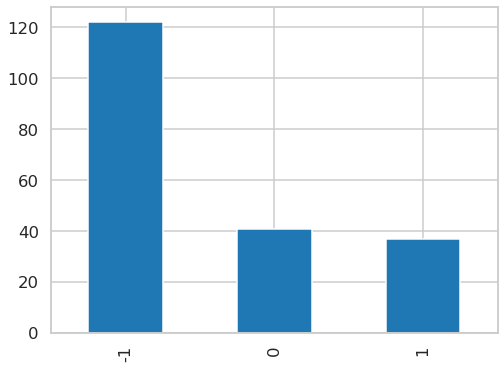

In [102]:
ClusterDF['ClusterID'].value_counts().plot(kind='bar')

#### Cluster Plots
Below written functions get utilized to plot 2-Dimensional and 3-Dimensional cluster plots on the available set of features in the dataset. Plots include different available clusters along with cluster centroid.

In [103]:
def Plot2DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 2)):
        plt.rcParams["figure.figsize"] = (8,6)
        xi,yi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1])
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            plt.scatter(DFC[i[0]],DFC[i[1]],cmap=plt.cm.Accent,label=j)
        plt.xlabel(i[0])
        plt.ylabel(i[1])
        plt.legend()
        plt.show()

def Plot3DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig,ax = plt.figure(figsize = (16, 10)),plt.axes(projection ="3d")
        ax.grid(b = True, color ='grey',linestyle ='-.',linewidth = 0.3,alpha = 0.2)
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            ax.scatter3D(DFC[i[0]],DFC[i[1]],DFC[i[2]],alpha = 0.8,cmap=plt.cm.Accent,label=j)
        ax.set_xlabel(i[0])
        ax.set_ylabel(i[1])
        ax.set_zlabel(i[2])
        plt.legend()
        plt.show()
    
def Plotly3D(X_Cols,df):
    for i in list(itertools.combinations(X_Cols,3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig2=px.scatter_3d(df, x=i[0], y=i[1],z=i[2],color=df['ClusterID'])
        fig2.show()

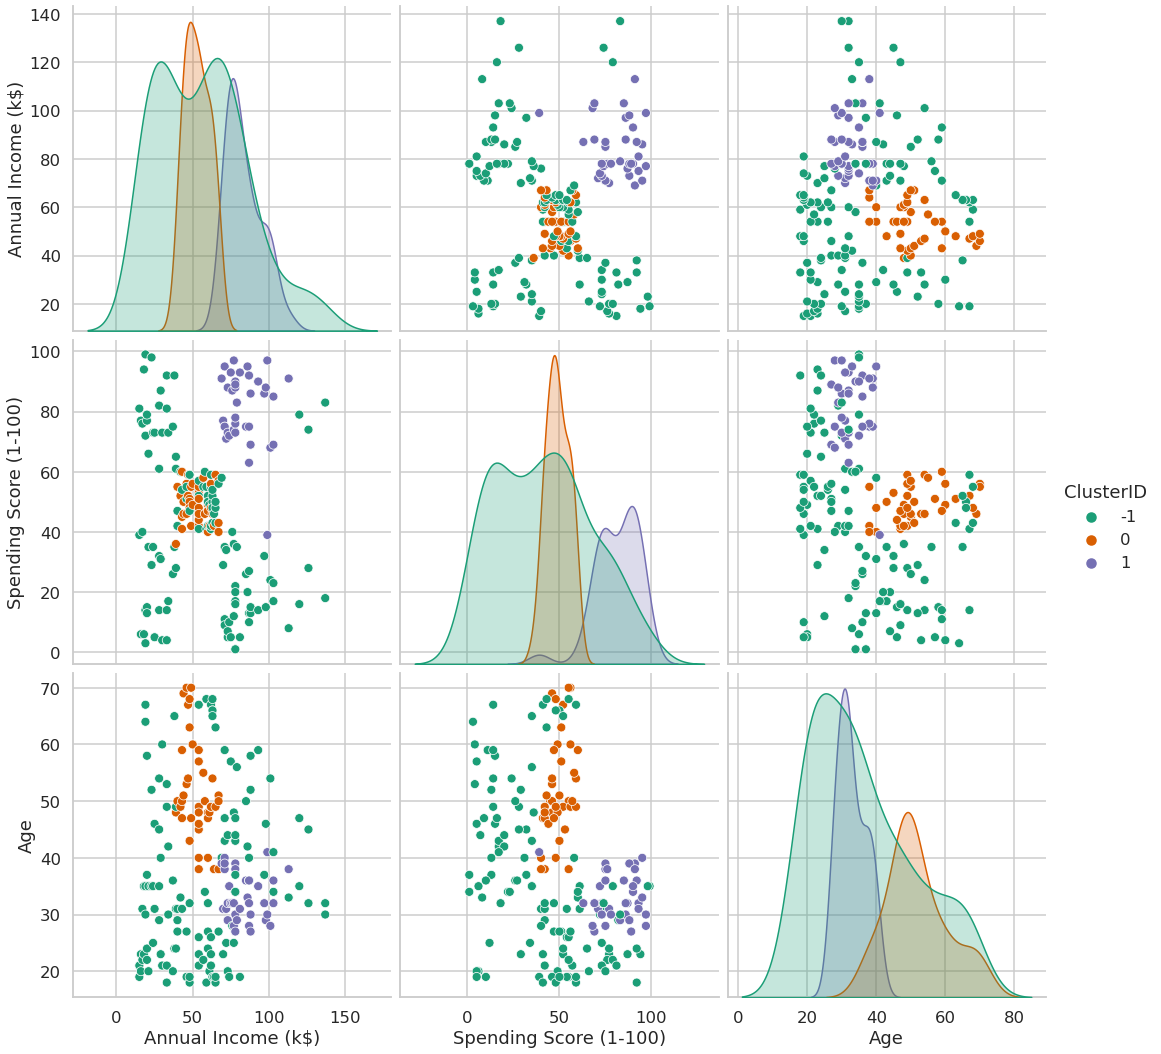

In [104]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.rcParams["lines.markeredgewidth"] = 1
sns.pairplot(data=ClusterDF, hue='ClusterID', palette='Dark2', height=5)

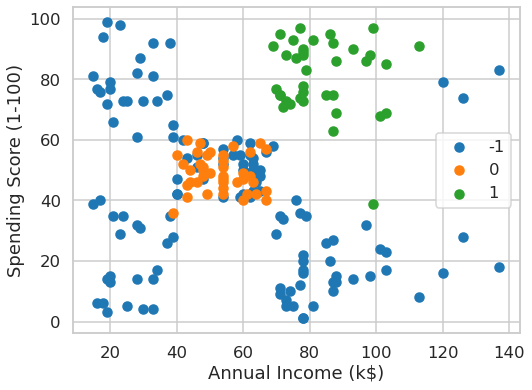

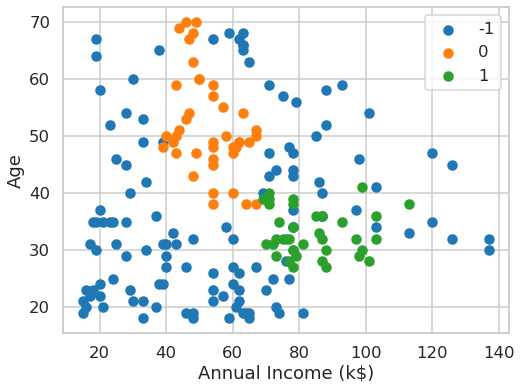

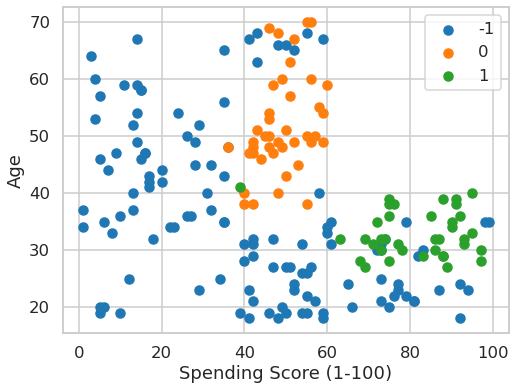

In [105]:
Plot2DCluster(X.columns,ClusterDF)

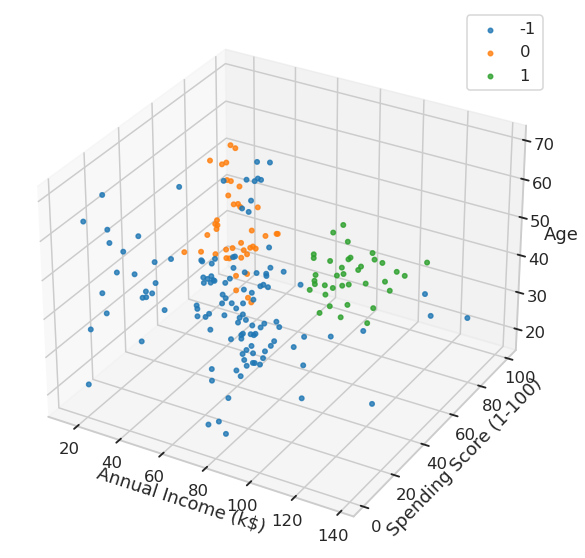

In [106]:
Plot3DCluster(X.columns,ClusterDF)

In [107]:
Plotly3D(X.columns,ClusterDF)

####  [Created by Thilakraj Devadiga](https://github.com/Thilakraj1998)